# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings
import pandas as pd


In [2]:
from google.colab import files
uploaded = files.upload()

Saving customer_booking.csv to customer_booking.csv


In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df_2=df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [6]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [7]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [8]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [9]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [10]:
df.booking_origin.unique()
df= df[df['booking_origin'] != '(not set)']

# Verify the result
df['booking_origin'].unique()
"Number of rows after cleaning:", len(df)

('Number of rows after cleaning:', 49916)

In [11]:
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type'])
df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,True,False,False,False,True
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,True,False,False,False,True
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,True,False,False,False,True
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,True,False,False,False,True
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,True,False,False,False,True
49996,1,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,True,False,False,False,True
49997,1,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,True,False,False,False,True
49998,1,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,True,False,False,False,True


In [12]:
df_1=df.drop(['route','booking_origin'],axis=1)

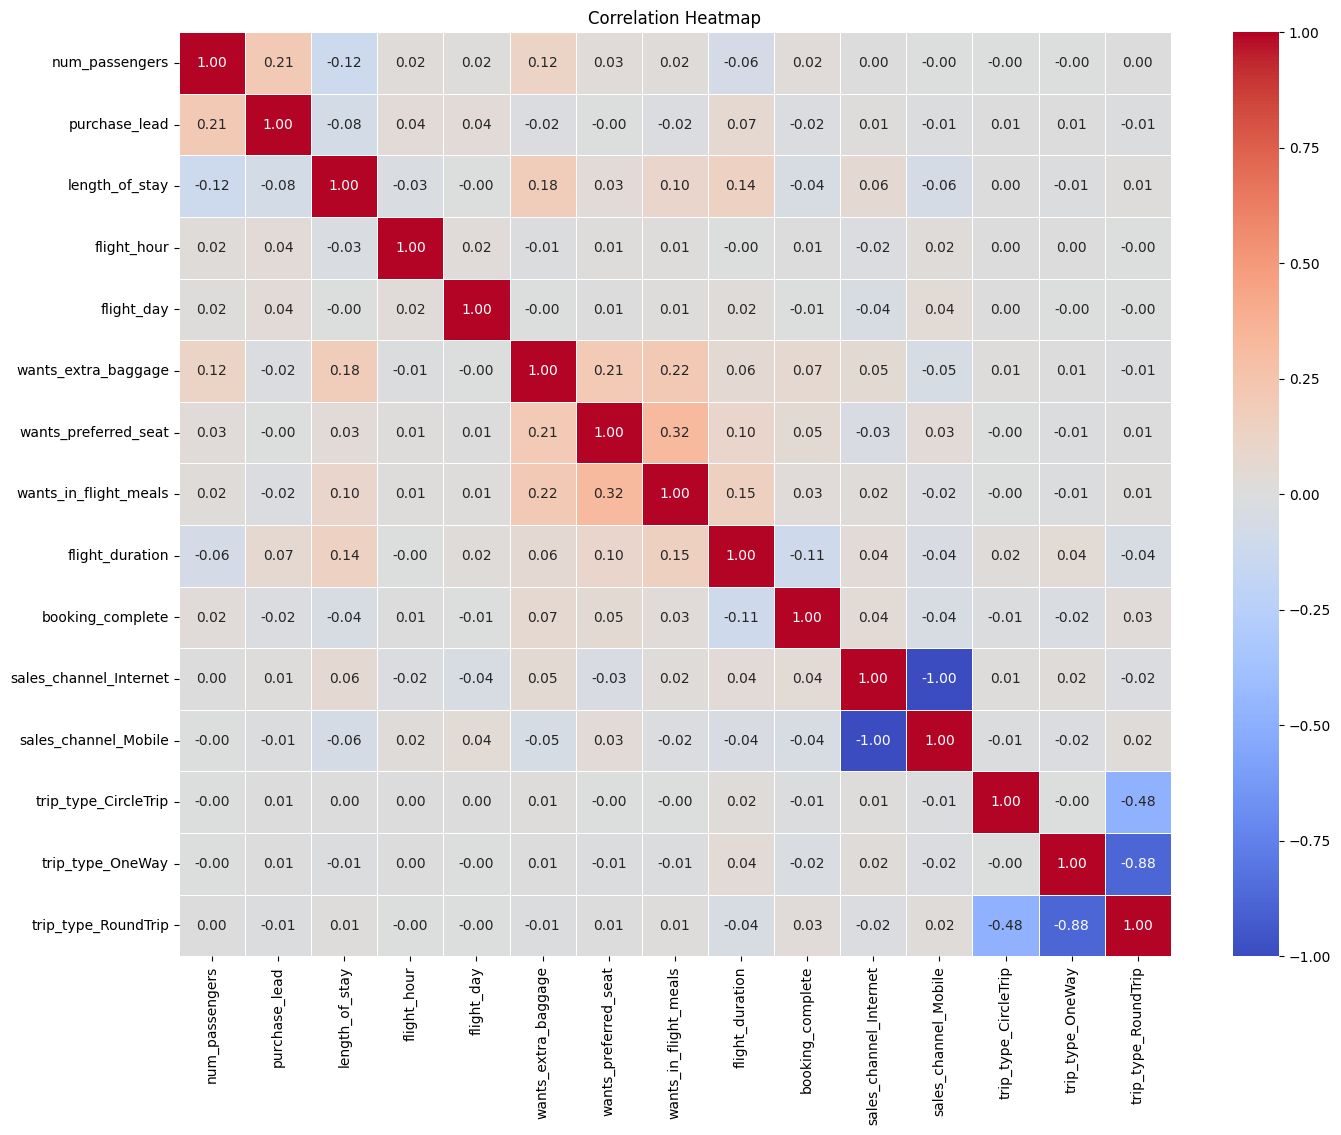

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df_1.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
df['start_route'] = df['route'].str[:3]
df['end_route'] = df['route'].str[-3:]

# Display the DataFrame
df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,start_route,end_route
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,True,False,False,False,True,AKL,DEL
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,True,False,False,False,True,AKL,DEL
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,True,False,False,False,True,AKL,DEL
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,True,False,False,False,True,AKL,DEL
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,True,False,False,False,True,AKL,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,True,False,False,False,True,PER,PNH
49996,1,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,True,False,False,False,True,PER,PNH
49997,1,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,True,False,False,False,True,PER,PNH
49998,1,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,True,False,False,False,True,PER,PNH


In [15]:
df.start_route.unique()

array(['AKL', 'AOR', 'BBI', 'BDO', 'BKI', 'BLR', 'BOM', 'BTJ', 'BTU',
       'BWN', 'CAN', 'CCU', 'CEB', 'CGK', 'CKG', 'CMB', 'CNX', 'COK',
       'CRK', 'CSX', 'CTS', 'CTU', 'CXR', 'DAC', 'DAD', 'DEL', 'DMK',
       'DPS', 'GOI', 'HAN', 'HDY', 'HGH', 'HKG', 'HKT', 'HND', 'HYD',
       'ICN', 'IKA', 'JED', 'JHB', 'JOG', 'KBR', 'KBV', 'KCH', 'KHH',
       'KIX', 'KLO', 'KNO', 'KOS', 'KTM', 'KWL', 'LBU', 'LGK', 'LOP',
       'LPQ', 'MAA', 'MEL', 'MFM', 'MLE', 'MNL', 'MRU', 'MYY', 'NRT',
       'OOL', 'PEK', 'PEN', 'PER', 'PNH', 'PNK', 'PUS', 'PVG', 'REP',
       'RGN', 'SBW', 'SDK', 'SGN', 'SIN', 'SRG', 'SUB', 'SYD', 'TGG',
       'TPE', 'TRZ', 'TWU', 'URT'], dtype=object)

In [16]:
df.end_route.unique()

array(['DEL', 'HGH', 'HND', 'ICN', 'KIX', 'KTM', 'KUL', 'MRU', 'PEK',
       'PVG', 'TPE', 'MEL', 'OOL', 'PER', 'SYD', 'CTS', 'CTU', 'IKA',
       'PUS', 'XIY', 'CKG', 'JED', 'WUH', 'COK', 'DPS', 'JHB', 'KCH',
       'LOP', 'MAA', 'MYY', 'PEN', 'PNH', 'SBW', 'SIN', 'SUB', 'TGG',
       'TRZ', 'TWU', 'DMK', 'HKT', 'KBR', 'KNO', 'LGK', 'SGN', 'KBV',
       'HKG', 'JOG', 'MFM', 'MNL', 'SZX', 'MLE', 'REP', 'RGN', 'SDK',
       'VTZ', 'PDG', 'URT', 'SWA', 'UTP', 'VTE', 'LPQ', 'LBU', 'NRT',
       'SRG'], dtype=object)

In [17]:
# Ensure the columns are integer types
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

# Display the DataFrame
df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,start_route,end_route
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1,0,0,0,1,AKL,DEL
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1,0,0,0,1,AKL,DEL
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1,0,0,0,1,AKL,DEL
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1,0,0,0,1,AKL,DEL
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1,0,0,0,1,AKL,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,1,0,0,0,1,PER,PNH
49996,1,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,1,0,0,0,1,PER,PNH
49997,1,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,1,0,0,0,1,PER,PNH
49998,1,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,1,0,0,0,1,PER,PNH


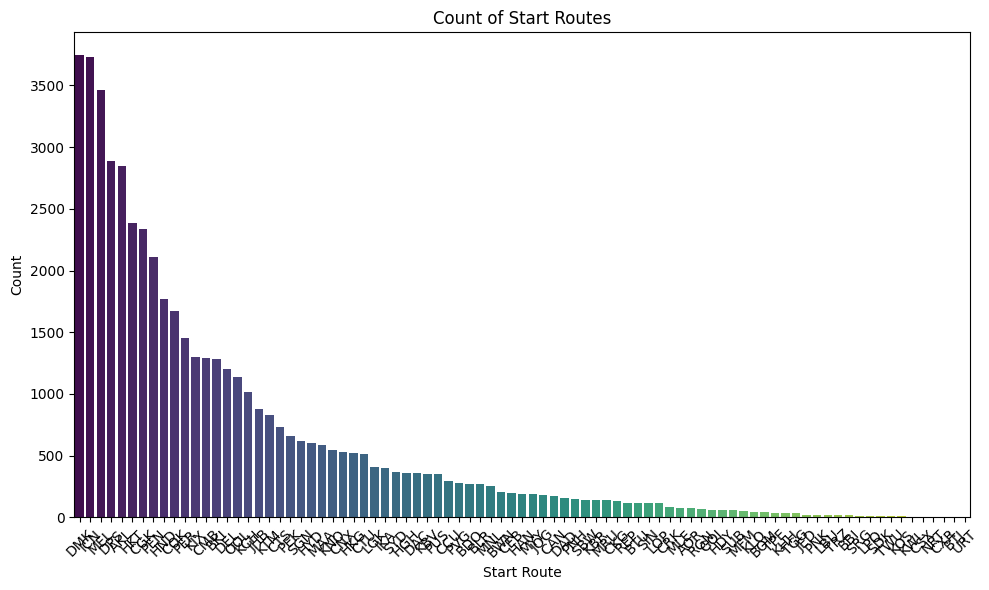

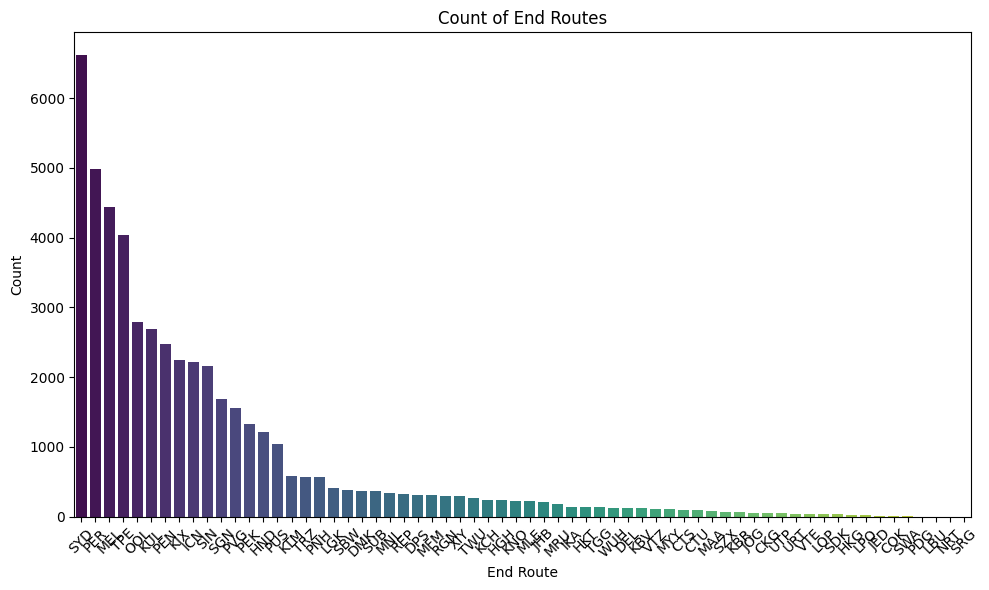

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='start_route', order=df['start_route'].value_counts().index, palette='viridis')
plt.title('Count of Start Routes')
plt.xlabel('Start Route')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting end_route sorted in descending order
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='end_route', order=df['end_route'].value_counts().index, palette='viridis')
plt.title('Count of End Routes')
plt.xlabel('End Route')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

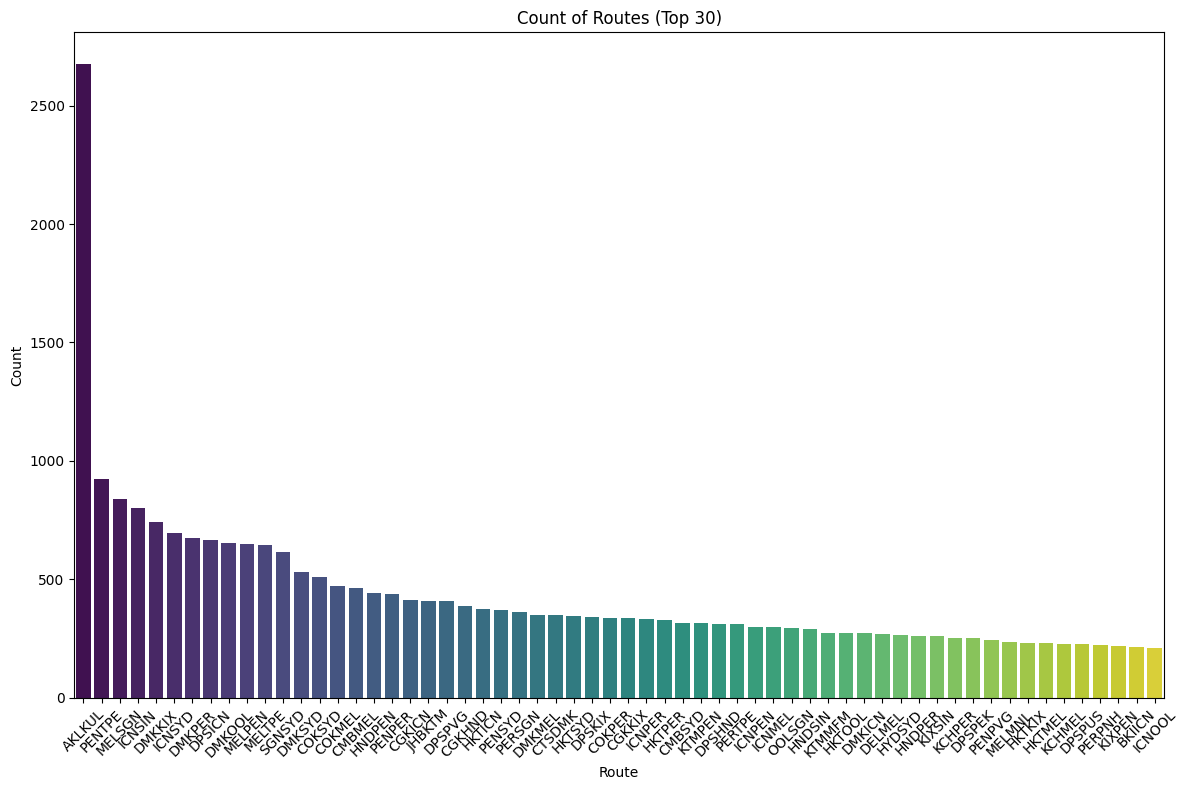

In [19]:
# Plotting route sorted in descending order for top 30 routes
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='route', order=df['route'].value_counts().index[:60], palette='viridis')
plt.title('Count of Routes (Top 30)')
plt.xlabel('Route')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

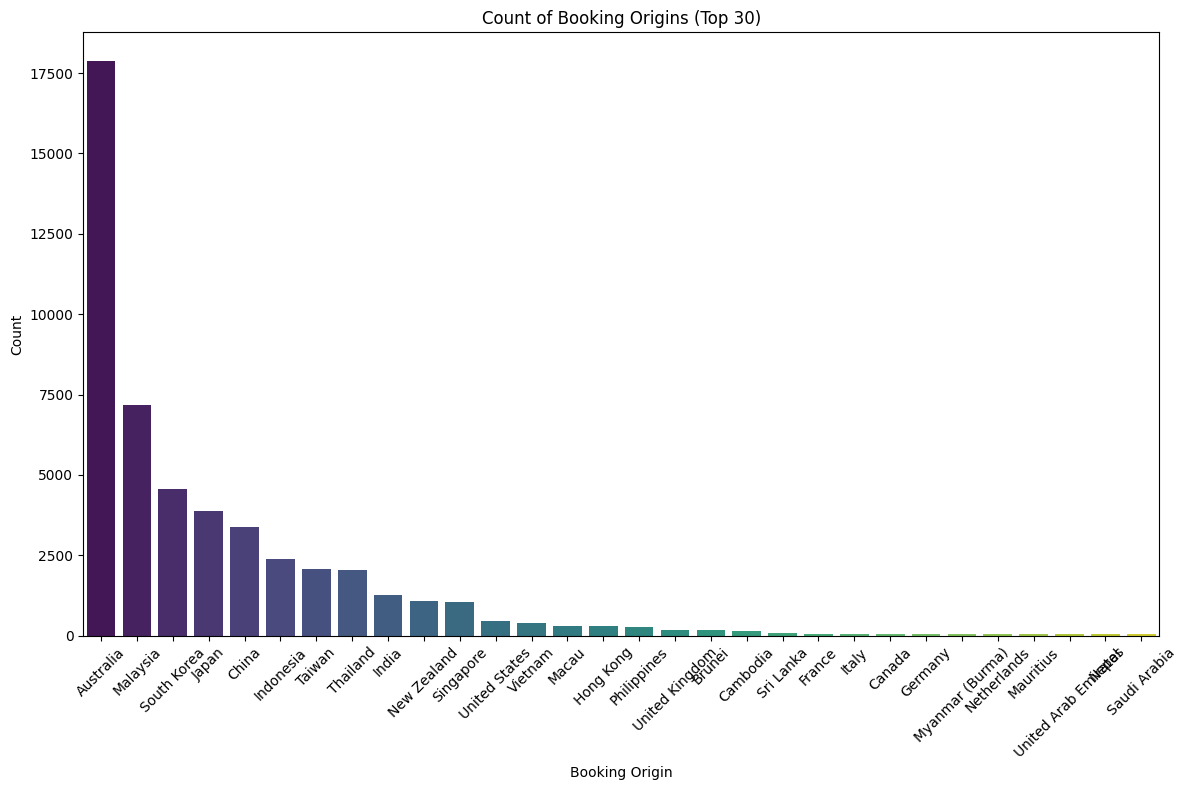

In [20]:
# Plotting booking_origin sorted in descending order for top 30 origins
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='booking_origin', order=df['booking_origin'].value_counts().index[:30], palette='viridis')
plt.title('Count of Booking Origins (Top 30)')
plt.xlabel('Booking Origin')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
df_notbooked=df[df['booking_complete']==0]

In [22]:
df_booked=df[df['booking_complete']==1]

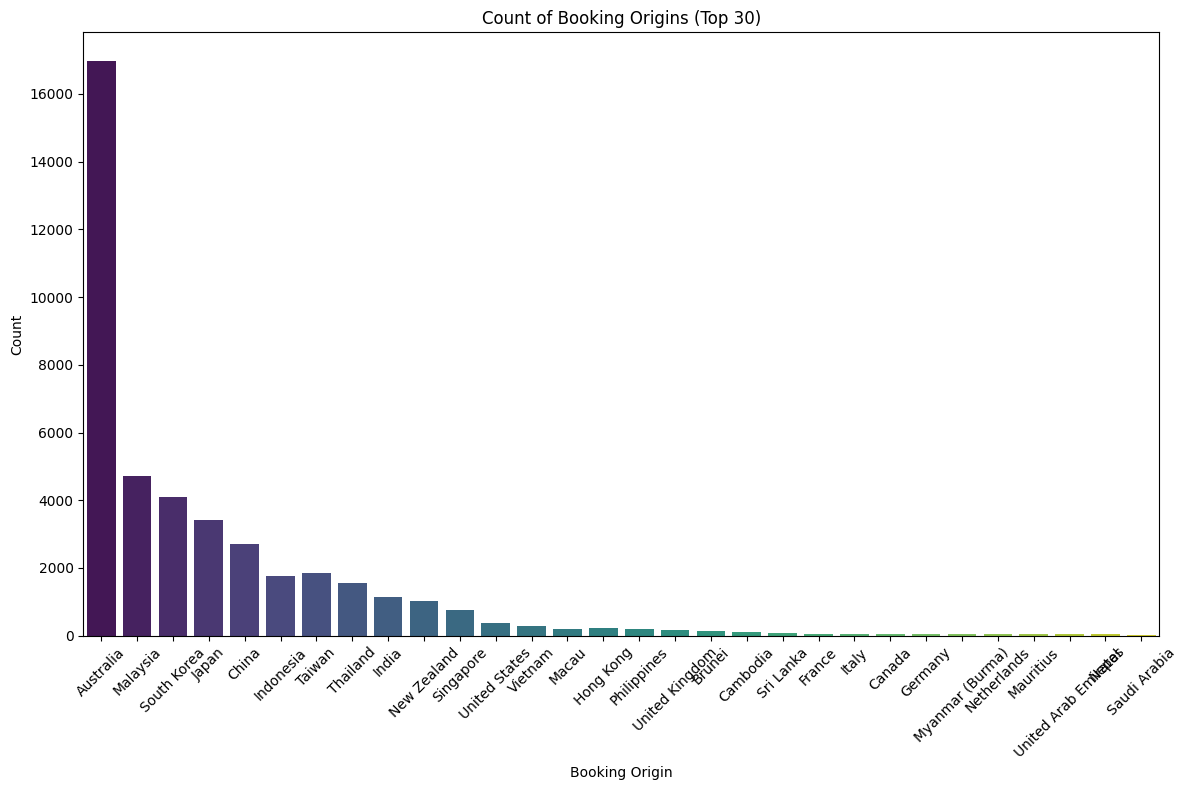

In [23]:
# Plotting booking_origin sorted in descending order for top 30 origins
plt.figure(figsize=(12, 8))
sns.countplot(data=df_notbooked, x='booking_origin', order=df['booking_origin'].value_counts().index[:30], palette='viridis')
plt.title('Count of Booking Origins (Top 30)')
plt.xlabel('Booking Origin')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

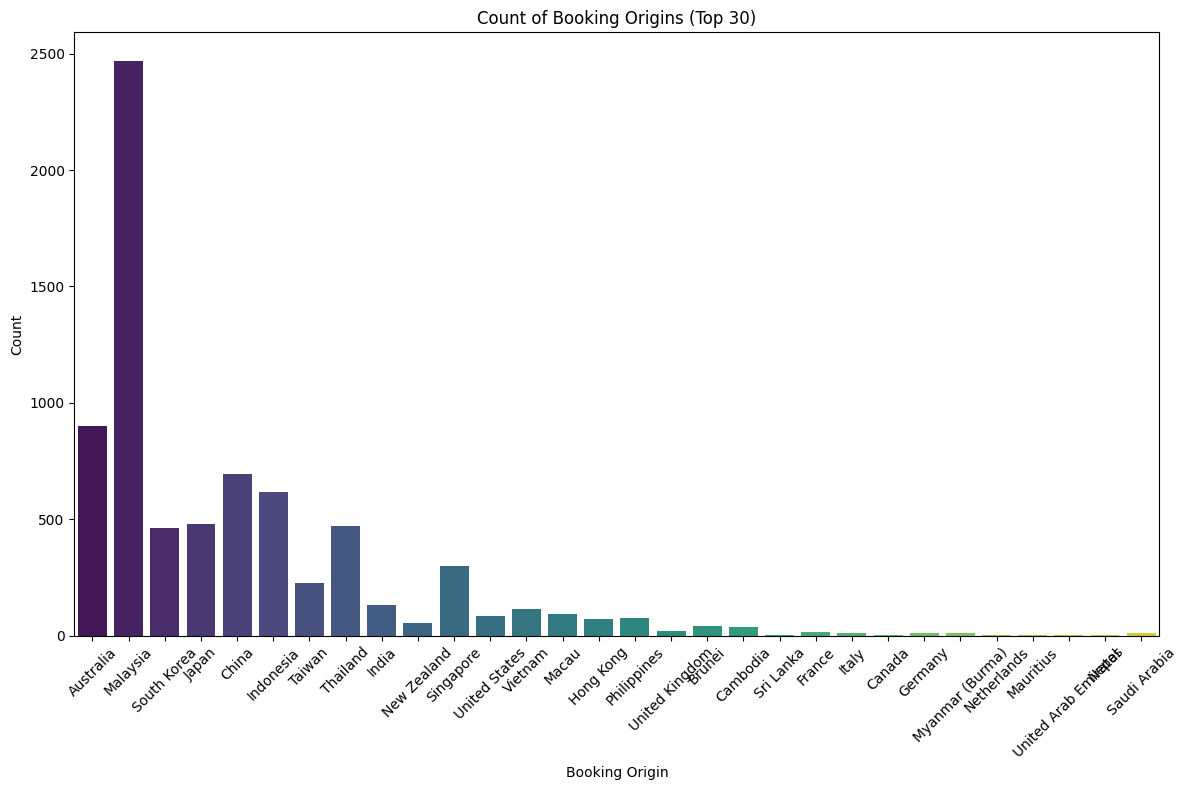

In [24]:
# Plotting booking_origin sorted in descending order for top 30 origins
plt.figure(figsize=(12, 8))
sns.countplot(data=df_booked, x='booking_origin', order=df['booking_origin'].value_counts().index[:30], palette='viridis')
plt.title('Count of Booking Origins (Top 30)')
plt.xlabel('Booking Origin')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
df_encoded=df

In [26]:
df_encoded['booking_complete'].value_counts()

,count
booking_complete,
0,42452
1,7464


In [27]:
df_encoded.dtypes

,0
num_passengers,int64
purchase_lead,int64
length_of_stay,int64
flight_hour,int64
flight_day,int64
route,object
booking_origin,object
wants_extra_baggage,int64
wants_preferred_seat,int64
wants_in_flight_meals,int64


In [28]:
#pip install --upgrade imbalanced-learn scikit-learn threadpoolctl

In [29]:
df_encoded.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'route', 'booking_origin', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'booking_complete', 'sales_channel_Internet', 'sales_channel_Mobile',
       'trip_type_CircleTrip', 'trip_type_OneWay', 'trip_type_RoundTrip',
       'start_route', 'end_route'],
      dtype='object')

In [30]:
df_encoded.dtypes

,0
num_passengers,int64
purchase_lead,int64
length_of_stay,int64
flight_hour,int64
flight_day,int64
route,object
booking_origin,object
wants_extra_baggage,int64
wants_preferred_seat,int64
wants_in_flight_meals,int64


In [31]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

# Separate features and target variable
X = df_encoded.drop(['booking_complete', 'route','start_route','end_route', 'booking_origin'], axis=1)
y = df_encoded['booking_complete']


# Apply SMOTE to balance the classes
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

from imblearn.over_sampling import SMOTE
X = df_encoded.drop('booking_complete', axis=1)
y = df_encoded['booking_complete']
#### Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

####Check the new class distribution
print("\nResampled class distribution:")
print(data_resampled['booking_complete'].value_counts())

from re import X
#RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X = df_encoded.drop('booking_complete', axis=1)
y = df_encoded['booking_complete']
X_resampled, y_resampled = rus.fit_resample(X, y)

In [32]:
y_resampled.value_counts()

,count
booking_complete,
0,42452
1,42452


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2,stratify=y_resampled)

In [34]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [200],
    'max_depth': [20],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': ['sqrt']
}

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the defined parameters
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, verbose=3)

# Perform the grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)

# Use the best estimator found by GridSearchCV
best_rf_clf = grid_search.best_estimator_

# Evaluate on test set
y_pred_rf = best_rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy:", accuracy)



Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.817 total time=  14.6s
[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.817 total time=  13.2s
[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.822 total time=  13.2s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.821 total time=  13.3s
[CV 5/5] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.818 total time=  13.4s
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Test Accuracy: 0.8290442258995347


In [35]:
print("Memorization score : ",grid_search.score(X_train,y_train))
print("Generalization score",grid_search.score(X_test,y_test))

Memorization score :  0.9018447359510033
Generalization score 0.8290442258995347


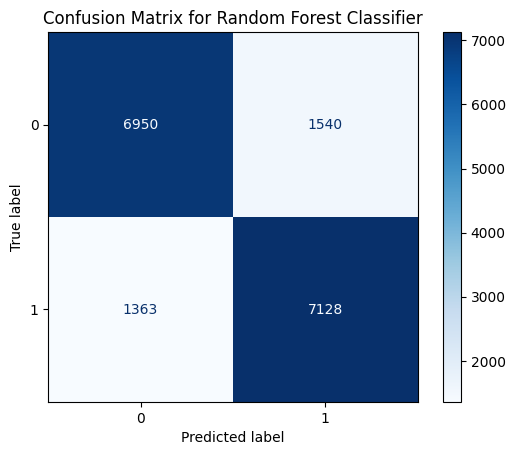

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      8490
           1       0.82      0.84      0.83      8491

    accuracy                           0.83     16981
   macro avg       0.83      0.83      0.83     16981
weighted avg       0.83      0.83      0.83     16981



In [38]:
# Feature importance
feature_importances = pd.DataFrame({'features': X_train.columns, 'feature_importance': best_rf_clf.feature_importances_})
feature_importances.sort_values('feature_importance', ascending=False, inplace=True)
feature_importances

,features,feature_importance
8,flight_duration,0.348672
1,purchase_lead,0.146552
2,length_of_stay,0.125018
3,flight_hour,0.100158
4,flight_day,0.069195
10,sales_channel_Mobile,0.060252
9,sales_channel_Internet,0.050978
0,num_passengers,0.033279
7,wants_in_flight_meals,0.026696
6,wants_preferred_seat,0.018745


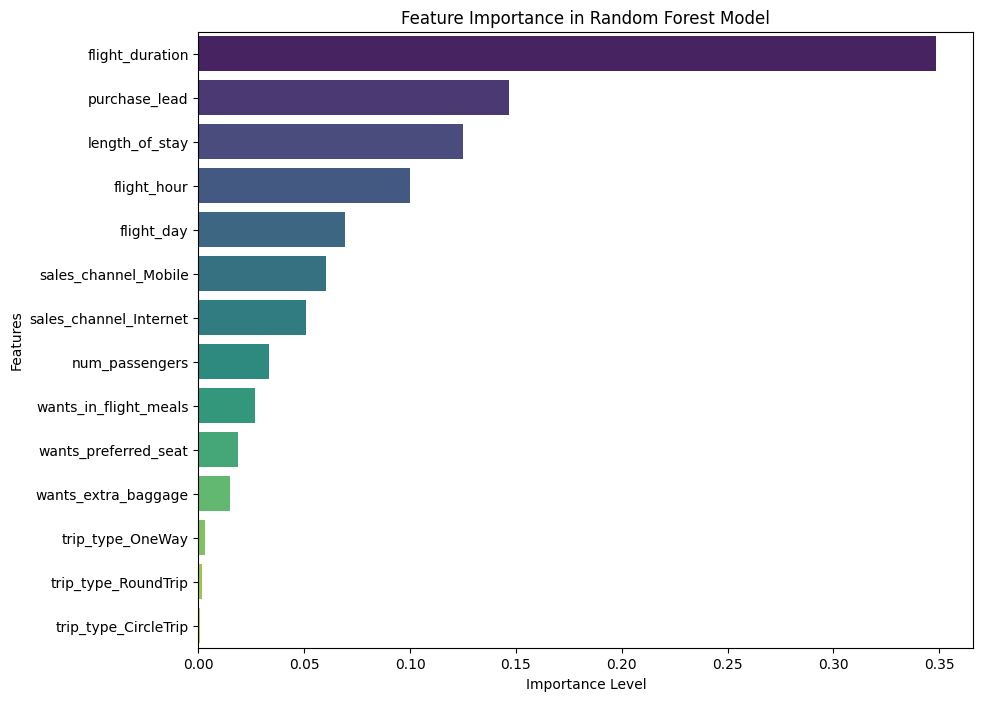

In [39]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 8))
sns.barplot(x='feature_importance', y='features', data=feature_importances, palette='viridis')

plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Level')
plt.ylabel('Features')
plt.show()

In [40]:
feature_importances[feature_importances['features']=='purchase_lead']

,features,feature_importance
1,purchase_lead,0.146552


from sklearn.svm import SVC
#### Define the parameter grid to search over
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf' ],
}

#### Initialize the SVC classifier
svc_clf = SVC(random_state=42)

#### Initialize GridSearchCV with the defined parameters
grid_search_svc = GridSearchCV(estimator=svc_clf, param_grid=param_grid_svc, cv=5,verbose=3)

#### Perform the grid search to find the best parameters
grid_search_svc.fit(X_train, y_train)

#### Get the best parameters and the best score
best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_
print("Best Parameters (SVC):", best_params_svc)

#### Use the best estimator found by GridSearchCV
best_svc_clf = grid_search_svc.best_estimator_

#### Evaluate on test set
y_pred_svc = best_svc_clf.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Test Accuracy (SVC):", accuracy_svc)

print("Memorization score : ",grid_search_svc.score(X_train,y_train))
print("Generalization score",grid_search_svc.score(X_test,y_test))

In [41]:
from sklearn.linear_model import LogisticRegression

# Define the parameter grid to search over
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Initialize the Logistic Regression classifier
lr_clf = LogisticRegression(random_state=42, max_iter=1000)

# Initialize GridSearchCV with the defined parameters
grid_search_lr = GridSearchCV(estimator=lr_clf, param_grid=param_grid_lr, cv=5,verbose=3)

# Perform the grid search to find the best parameters
grid_search_lr.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_
print("Best Parameters (Logistic Regression):", best_params_lr)


# Use the best estimator found by GridSearchCV
best_lr_clf = grid_search_lr.best_estimator_

# Evaluate on test set
y_pred_lr = best_lr_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Test Accuracy (Logistic Regression):", accuracy_lr)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.646 total time=   8.2s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.645 total time=   7.6s
[CV 3/5] END .................C=0.1, penalty=l2;, score=0.645 total time=   7.4s
[CV 4/5] END .................C=0.1, penalty=l2;, score=0.637 total time=   8.4s
[CV 5/5] END .................C=0.1, penalty=l2;, score=0.653 total time=   6.6s
[CV 1/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .....................C=1, penalty=l1

In [42]:
print("Memorization score : ",grid_search_lr.score(X_train,y_train))
print("Generalization score",grid_search_lr.score(X_test,y_test))

Memorization score :  0.6463642654181941
Generalization score 0.6436016724574525


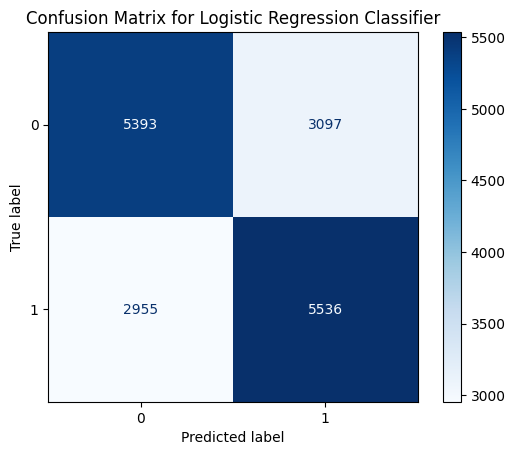

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show();

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64      8490
           1       0.64      0.65      0.65      8491

    accuracy                           0.64     16981
   macro avg       0.64      0.64      0.64     16981
weighted avg       0.64      0.64      0.64     16981



Basic Information
<class 'pandas.core.frame.DataFrame'>
Index: 49916 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_passengers          49916 non-null  int64  
 1   purchase_lead           49916 non-null  int64  
 2   length_of_stay          49916 non-null  int64  
 3   flight_hour             49916 non-null  int64  
 4   flight_day              49916 non-null  int64  
 5   route                   49916 non-null  object 
 6   booking_origin          49916 non-null  object 
 7   wants_extra_baggage     49916 non-null  int64  
 8   wants_preferred_seat    49916 non-null  int64  
 9   wants_in_flight_meals   49916 non-null  int64  
 10  flight_duration         49916 non-null  float64
 11  booking_complete        49916 non-null  int64  
 12  sales_channel_Internet  49916 non-null  int64  
 13  sales_channel_Mobile    49916 non-null  int64  
 14  trip_type_CircleTrip    4

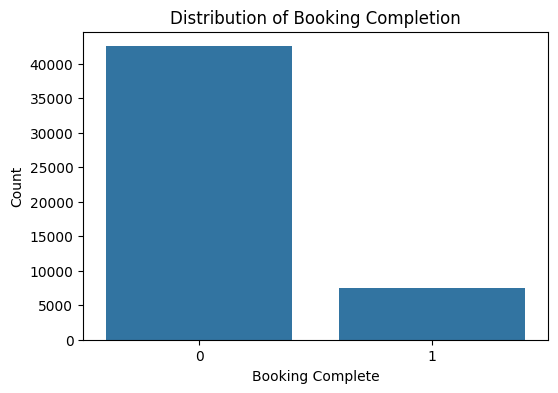

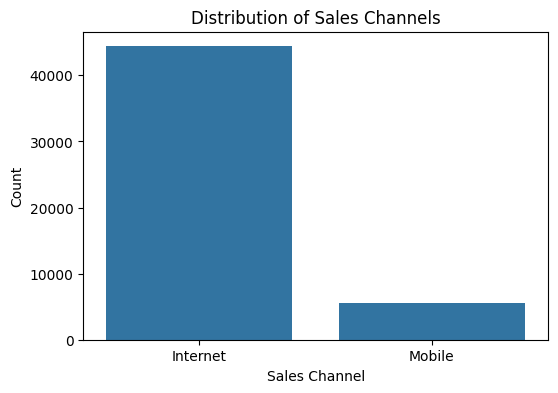

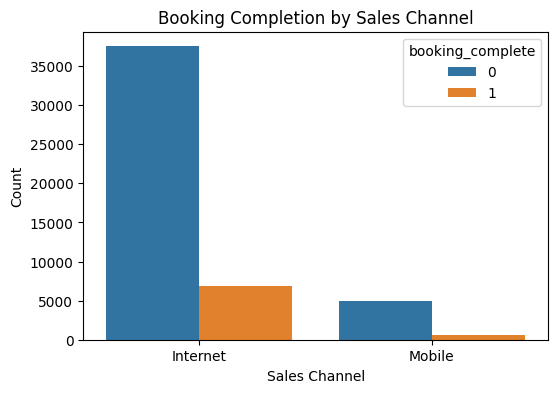

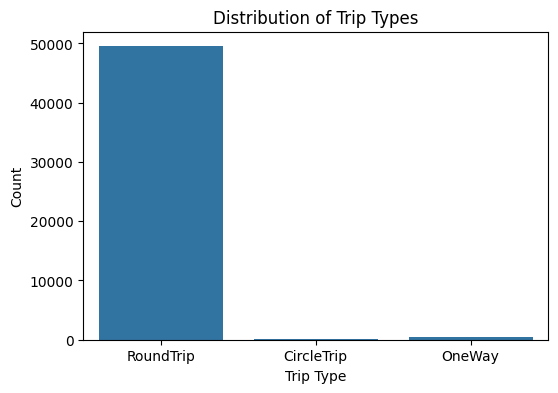

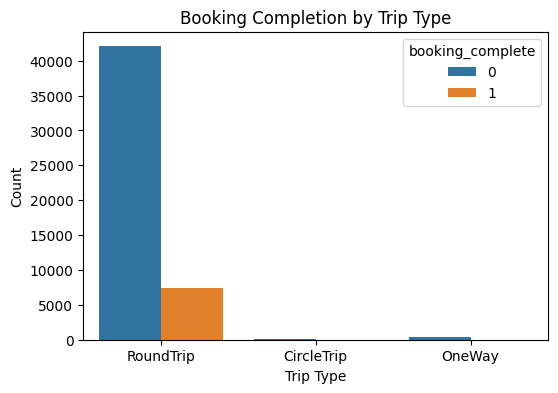

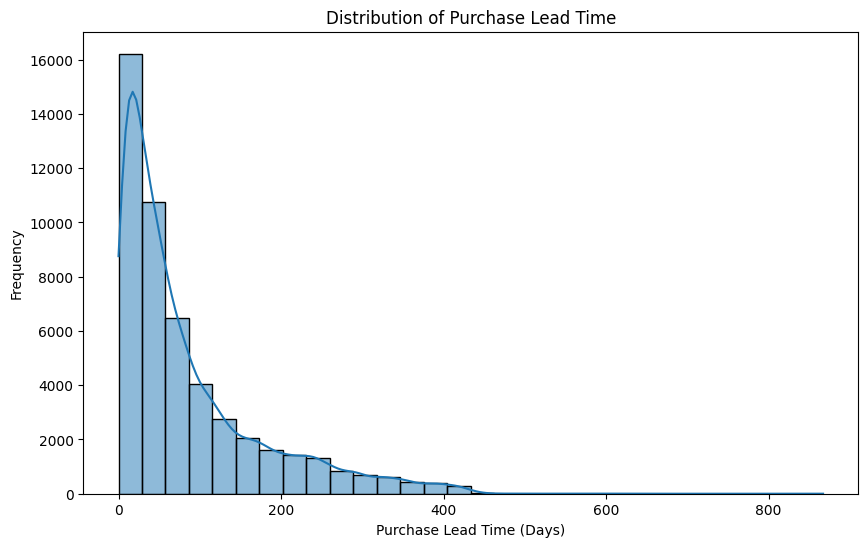

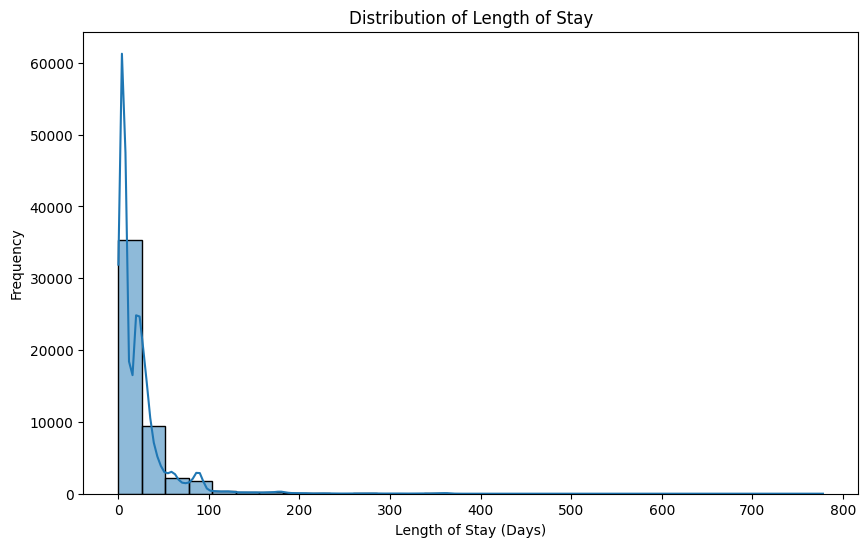

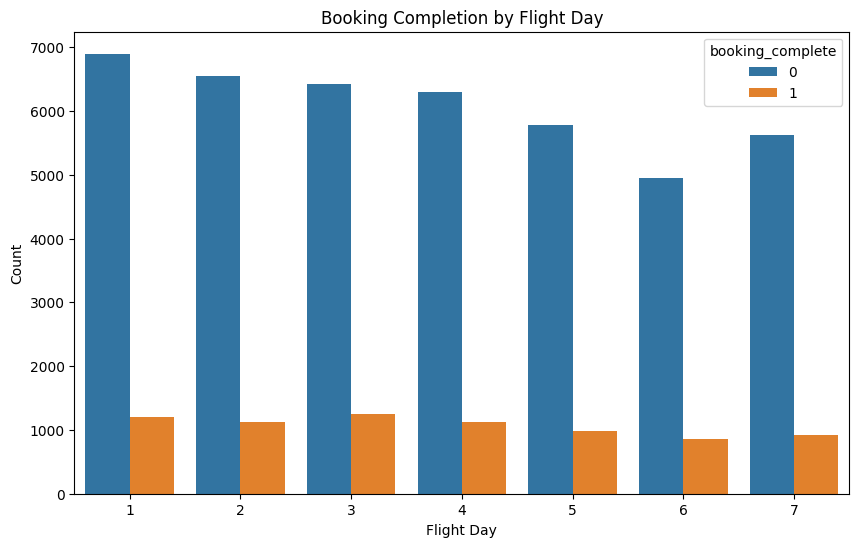

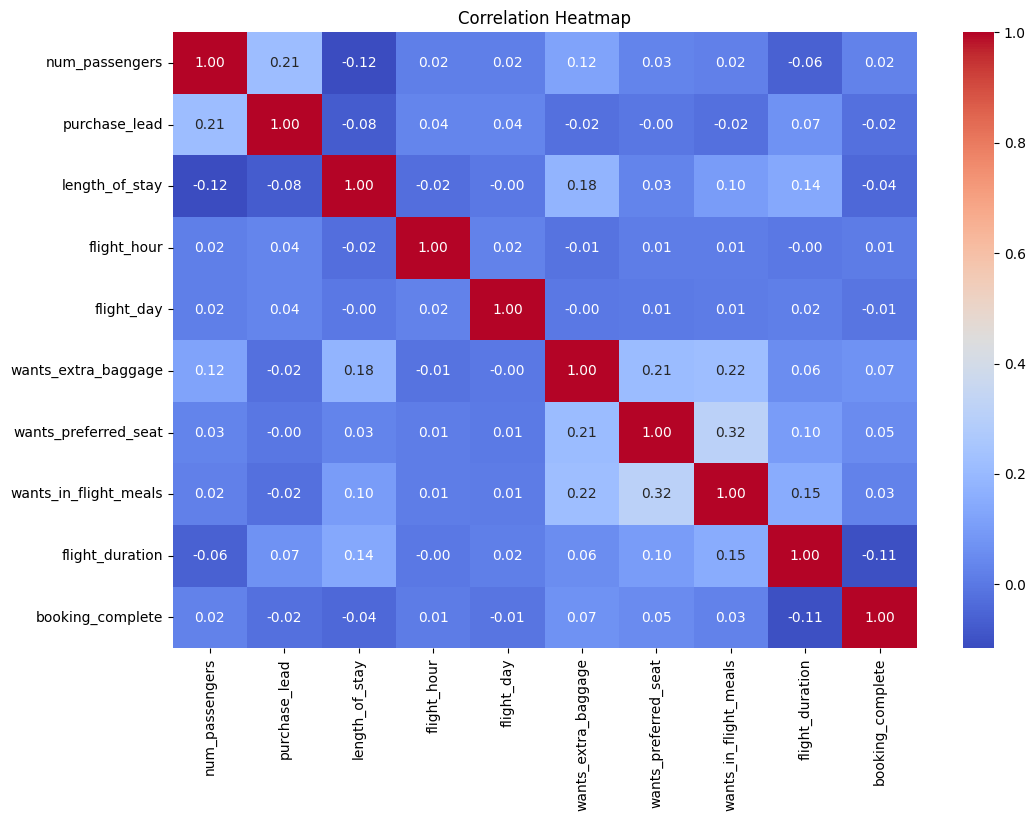

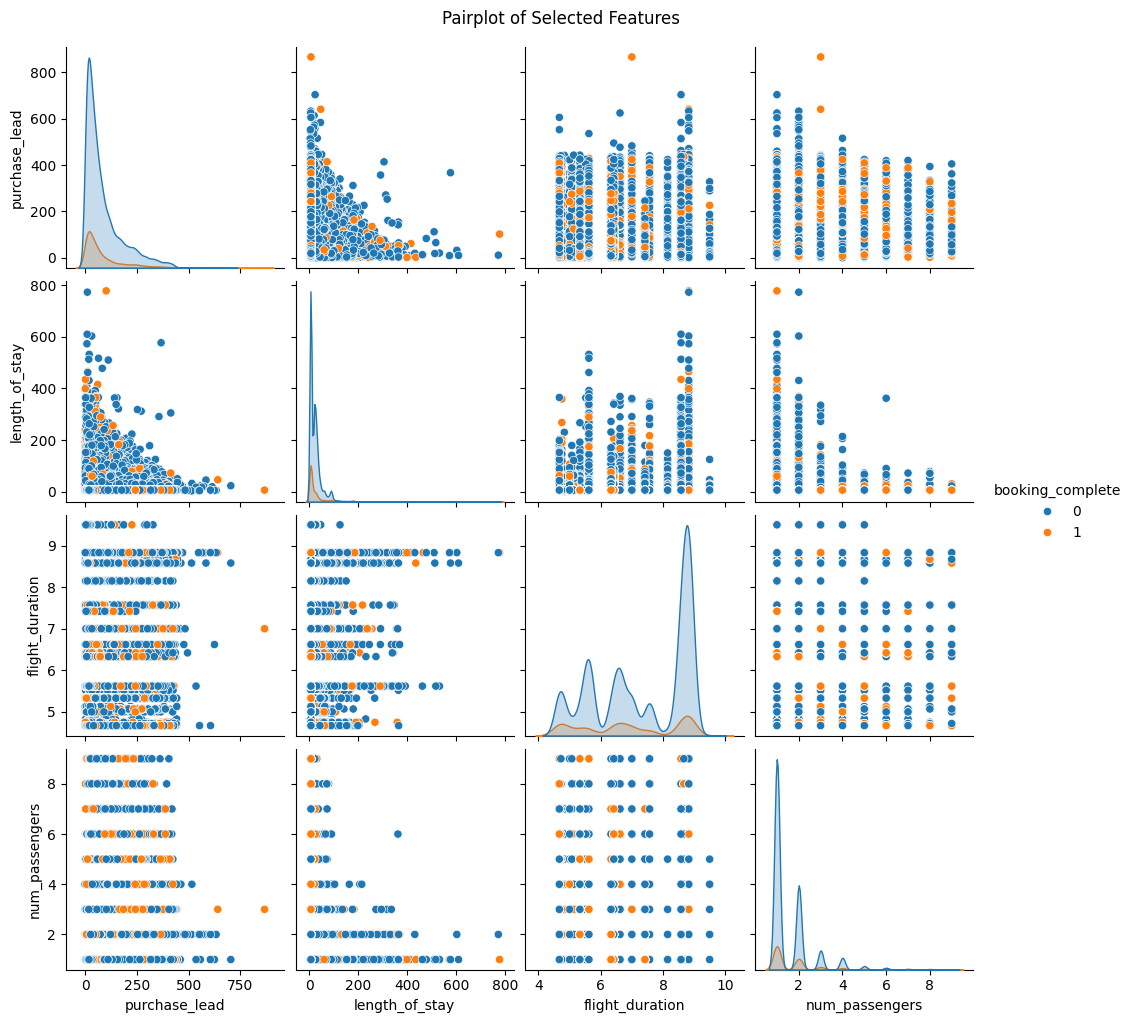

In [45]:
# Display basic information about the dataset
print("Basic Information")
print(df.info())
print("\n")


# Check for missing values
print("Missing Values")
print(df.isnull().sum())
print("\n")

# Summary statistics of numerical features
print("Summary Statistics")
print(df.describe())
print("\n")

# Analyze distribution of the target variable 'booking_complete'
plt.figure(figsize=(6, 4))
sns.countplot(x='booking_complete', data=df_2)
plt.title('Distribution of Booking Completion')
plt.xlabel('Booking Complete')
plt.ylabel('Count')
plt.show()

# Analyze distribution of sales channels
plt.figure(figsize=(6, 4))
sns.countplot(x='sales_channel', data=df_2)
plt.title('Distribution of Sales Channels')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.show()

# Analyze booking completion by sales channel
plt.figure(figsize=(6, 4))
sns.countplot(x='sales_channel', hue='booking_complete', data=df_2)
plt.title('Booking Completion by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.show()

# Analyze distribution of trip types
plt.figure(figsize=(6, 4))
sns.countplot(x='trip_type', data=df_2)
plt.title('Distribution of Trip Types')
plt.xlabel('Trip Type')
plt.ylabel('Count')
plt.show()

# Analyze booking completion by trip type
plt.figure(figsize=(6, 4))
sns.countplot(x='trip_type', hue='booking_complete', data=df_2)
plt.title('Booking Completion by Trip Type')
plt.xlabel('Trip Type')
plt.ylabel('Count')
plt.show()

# Analyze the purchase lead time distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_2['purchase_lead'], bins=30, kde=True)
plt.title('Distribution of Purchase Lead Time')
plt.xlabel('Purchase Lead Time (Days)')
plt.ylabel('Frequency')
plt.show()

# Analyze length of stay distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['length_of_stay'], bins=30, kde=True)
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Frequency')
plt.show()

# Analyze booking completion by flight day
plt.figure(figsize=(10, 6))
sns.countplot(x='flight_day', hue='booking_complete', data=df_2)
plt.title('Booking Completion by Flight Day')
plt.xlabel('Flight Day')
plt.ylabel('Count')
plt.show()

numeric_df = df_2.select_dtypes(include=[float, int])

# Correlation heatmap to understand relationships between numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot to analyze relationships between selected numerical features
selected_features = ['purchase_lead', 'length_of_stay', 'flight_duration', 'num_passengers']
sns.pairplot(df_2[selected_features + ['booking_complete']], hue='booking_complete')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()